# Problem Statement:
BrightMotor Company, a manufacturer and seller of automobiles (primarily SUVs), wants to improve its understanding of customer profiles, financial capabilities, and how these factors influence vehicle purchase decisions. With growing competition in the automobile sector and the availability of various financing options, it has become crucial to understand which customer segments are more likely to purchase vehicles and under what financial conditions (e.g., personal/house loans, working partner, etc.).

# Business Context:
BrightMotor collects detailed information about its customers at the point of purchase or inquiry, including:

Demographics: Age, Gender, Marital Status, Education

Professional: Profession, Partner working status

Financial: Salary, Partner Salary, Loan status (Personal/House), Total income

Purchase: Car Make (e.g., SUV), Price paid

The leadership team wants to use this data to:

Understand customer segments likely to buy vehicles, especially premium models like SUVs.

Evaluate the impact of financial background (e.g., loans, partner salary) on a customer's ability to afford vehicles.

Identify the typical profile of a high-value customer.

Assess whether certain groups (by gender, profession, etc.) are underserved or overserved.

Predict vehicle affordability based on salary and loan status.

Clean and impute missing data to improve reliability of insights.



# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataset= pd.read_csv("bright_automotive_company.csv")

# Basic Exploration of Data

In [3]:
dataset.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


Gender typo: "Femal" should be "Female".

Missing values: ? and NaN found in No_of_Dependents, Profession, and Make.

Same age: All top 5 entries have age 53.

High salaries: Salaries are relatively high, worth validating.

Total salary is accurate: Sum of Salary + Partner_salary matches Total_salary.

Loan variation: Mixed Yes/No for personal and house loans.

Profession issues: One NaN value; others mostly Salaried.

Car make mostly SUV: Low variety; one value is "?".

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


# Null values present:
Gender: 53 missing
Profession: 6 missing
Salary: 13 missing
Partner_salary: 106 missing

# No_of_Dependents is object:
Should be numeric — likely contains invalid entries like "?".

# Data Types:
Mixed types: 9 object (categorical), 5 numeric (int64 or float64).
Possible need for type conversion (No_of_Dependents, Make).

# No missing values in key columns:
Age, Marital_status, Education, Price, and Total_salary are complete.

In [5]:
dataset.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


# Age

Mean: ~32 years, most users are young.

Min: 14 (very young), Max: 120 (likely an outlier, may need cleaning).

# Salary

Mean: ₹60,277

Max: ₹99,300 — indicates some high earners.

25% earn below ₹51,900; 75% earn below ₹71,700.

# Partner Salary

Mean: ₹20,226 — significantly lower than applicant salary.

25% of records have ₹0 partner salary (i.e., no working partner or missing).

Max: ₹80,500.

In [6]:
dataset.shape

(1581, 14)

In [7]:
dataset.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [8]:
print(dataset.isnull().sum())

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


In [9]:
print(dataset.duplicated().sum())

0


In [10]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB
None


<Axes: >

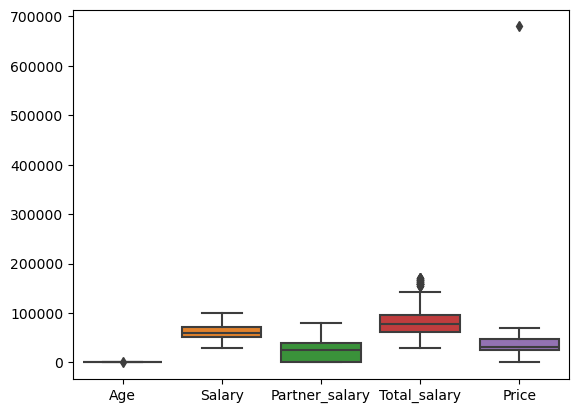

In [11]:
sns.boxplot(dataset)

C:\Users\khurshid alam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


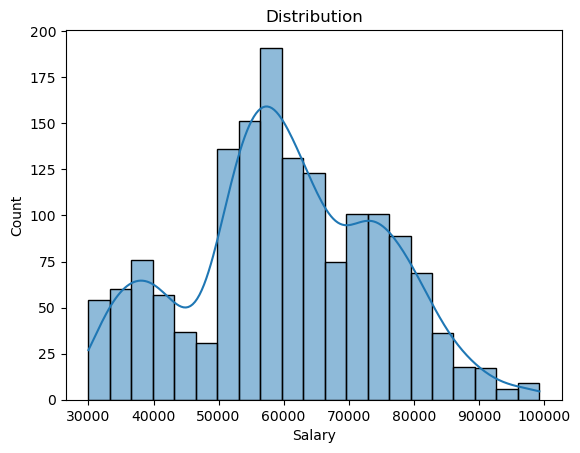

In [12]:
sns.histplot(dataset['Salary'],kde=True)
plt.title("Distribution")
plt.show()

In [13]:
correlation = dataset.corr(numeric_only=True)
print(correlation)

                     Age    Salary  Partner_salary  Total_salary     Price
Age             1.000000  0.602355        0.134084      0.457876  0.528360
Salary          0.602355  1.000000        0.080543      0.644855  0.285073
Partner_salary  0.134084  0.080543        1.000000      0.813945  0.114920
Total_salary    0.457876  0.644855        0.813945      1.000000  0.258060
Price           0.528360  0.285073        0.114920      0.258060  1.000000


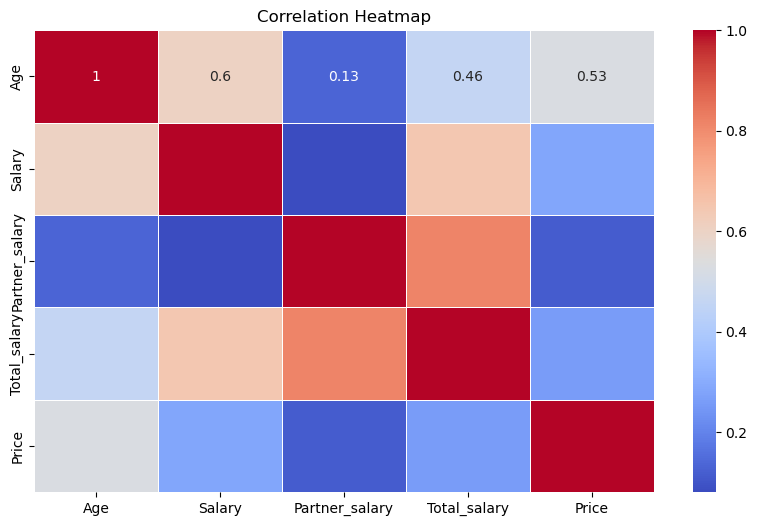

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Age - Salary/Price: 
Moderate positive correlation (0.6, 0.53).

Salary - Total Salary: 
Strong correlation (0.64).

Partner Salary - Total Salary:
Very strong correlation (0.81).

Total Salary - Price: 
Weak correlation (0.26).

Salary/Partner Salary - Price: 
Weak to very weak correlation (0.29, 0.11).

# What are the mean, median, and standard deviation of the ages of individuals in the dataset?

In [15]:
mean_age = dataset['Age'].mean()
median_age = dataset['Age'].median()
std_age = dataset['Age'].std()

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation of Age: {std_age:.2f}")


Mean Age: 31.95
Median Age: 29.0
Standard Deviation of Age: 8.71


In [16]:
initial_shape = dataset.shape
dataset.drop_duplicates(inplace=True)
print(f"Duplicates removed: {initial_shape[0] - dataset.shape[0]}")


Duplicates removed: 0


In [17]:
# Drop any unnamed columns (like 'Unnamed: 0' from CSVs)
dataset.drop(columns=[col for col in dataset.columns if 'unnamed' in col.lower()], inplace=True)


# Handling Null Values

In [18]:
# Check null values
print("Null values before imputation:\n", dataset.isnull().sum())

# Fill nulls
dataset['Salary'].fillna(dataset['Salary'].median(), inplace=True)
dataset['Partner_salary'].fillna(0, inplace=True)  # Assuming 0 if no partner income

# Recalculate Total Salary if needed
dataset['Total_salary'] = dataset['Salary'] + dataset['Partner_salary']

# For categorical fields: fill with mode
categorical_cols = ['Gender', 'Profession', 'Marital_status', 'Education', 
                    'Personal_loan', 'House_loan', 'Partner_working']

for col in categorical_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

print("Null values after imputation:\n", dataset.isnull().sum())


Null values before imputation:
 Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64
Null values after imputation:
 Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64


In [19]:
# Strip spaces and fix case issues
for col in categorical_cols:
    dataset[col] = dataset[col].str.strip().str.title()

# Optional: fix specific known anomalies (e.g., Male/male/mALE to Male)
dataset['Gender'] = dataset['Gender'].replace({'M': 'Male', 'F': 'Female'})


In [20]:
binary_cols = ['Personal_loan', 'House_loan', 'Partner_working']
for col in binary_cols:
    dataset[col] = dataset[col].map({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})


# Removing Outliers

In [21]:
def remove_outliers_iqr(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return dataset[(dataset[column] >= lower) & (dataset[column] <= upper)]

for col in ['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price']:
    dataset = remove_outliers_iqr(dataset, col)


In [22]:
print("Final Data Types:\n", dataset.dtypes)
print("Final Shape of Cleaned Data:", dataset.shape)
print("Any remaining nulls:\n", dataset.isnull().sum())


Final Data Types:
 Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents     object
Personal_loan         int64
House_loan            int64
Partner_working       int64
Salary              float64
Partner_salary      float64
Total_salary        float64
Price                 int64
Make                 object
dtype: object
Final Shape of Cleaned Data: (1555, 14)
Any remaining nulls:
 Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64


# What is the distribution of gender in the dataset? Represent it using a pie chart.

Gender
Male      1239
Female     316
Name: count, dtype: int64


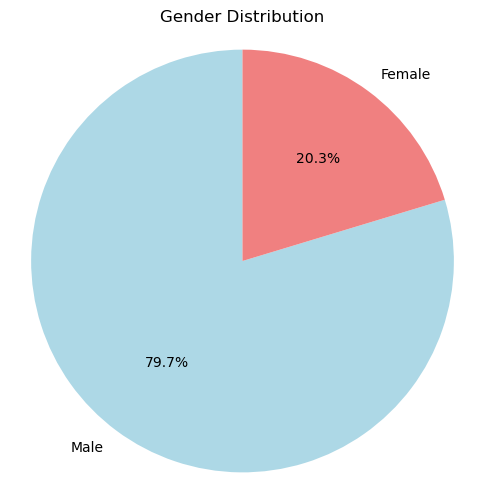

In [25]:
gender_counts = dataset['Gender'].value_counts()
print(gender_counts)
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title("Gender Distribution")
plt.axis('equal')
plt.show()

In [24]:
dataset['Gender'].replace({'Femal':'Female','Femle':'Female'},inplace=True)

In [26]:
correlation = dataset['Age'].corr(dataset['Salary'])
print(f"Correlation between Age and Salary: {correlation:.2f}")

if correlation > 0.5:
    print("→ Strong positive correlation: Older individuals tend to have higher salaries.")
elif correlation > 0.3:
    print("→ Moderate positive correlation: Age somewhat increases with salary.")
elif correlation > 0:
    print("→ Weak positive correlation: Slight increase in salary with age.")
elif correlation < 0:
    print("→ Negative correlation: As age increases, salary decreases.")
else:
    print("→ No correlation between age and salary.")


Correlation between Age and Salary: 0.57
→ Strong positive correlation: Older individuals tend to have higher salaries.


# What is the average salary for individuals based on their educational qualifications (Graduate vs. Post Graduate)?

In [27]:
avg_salary_by_education = dataset.groupby('Education')['Salary'].mean()
print(avg_salary_by_education)


Education
Graduate         48169.543147
Post Graduate    66792.064315
Name: Salary, dtype: float64


In [28]:
# Normalize Education column (if not done already)
dataset['Education'] = dataset['Education'].str.strip().str.title()

# Calculate average salary by Education
avg_salary = dataset.groupby('Education')['Salary'].mean()

graduate_salary = avg_salary.get('Graduate', np.nan)
postgraduate_salary = avg_salary.get('Post Graduate', np.nan)

percentage_increase = ((postgraduate_salary - graduate_salary) / graduate_salary) * 100

print(f"Average Salary for Graduates: {graduate_salary:.2f}")
print(f"Average Salary for Post Graduates: {postgraduate_salary:.2f}")
print(f"Post Graduates earn {percentage_increase:.2f}% more than Graduates on average.")


Average Salary for Graduates: 48169.54
Average Salary for Post Graduates: 66792.06
Post Graduates earn 38.66% more than Graduates on average.


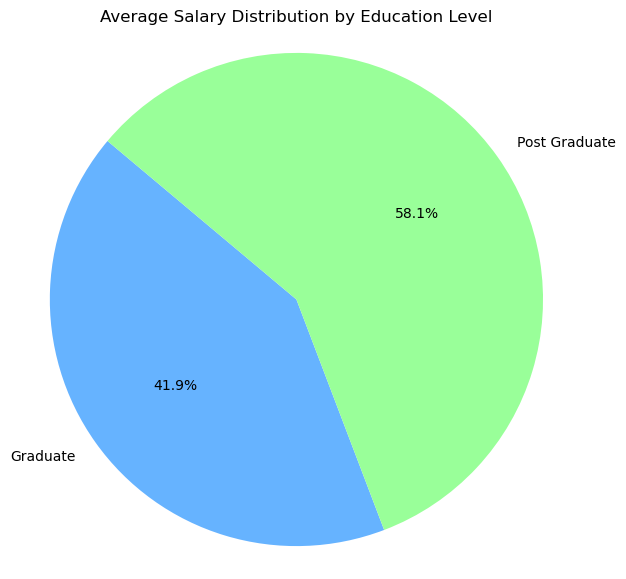

In [29]:
import matplotlib.pyplot as plt
labels = avg_salary.index
sizes = avg_salary.values

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Average Salary Distribution by Education Level')
plt.axis('equal') 

plt.show()


# Is there a correlation between age and salary? Provide the correlation coefficient and interpret the result

Correlation between Age and Salary: 0.57


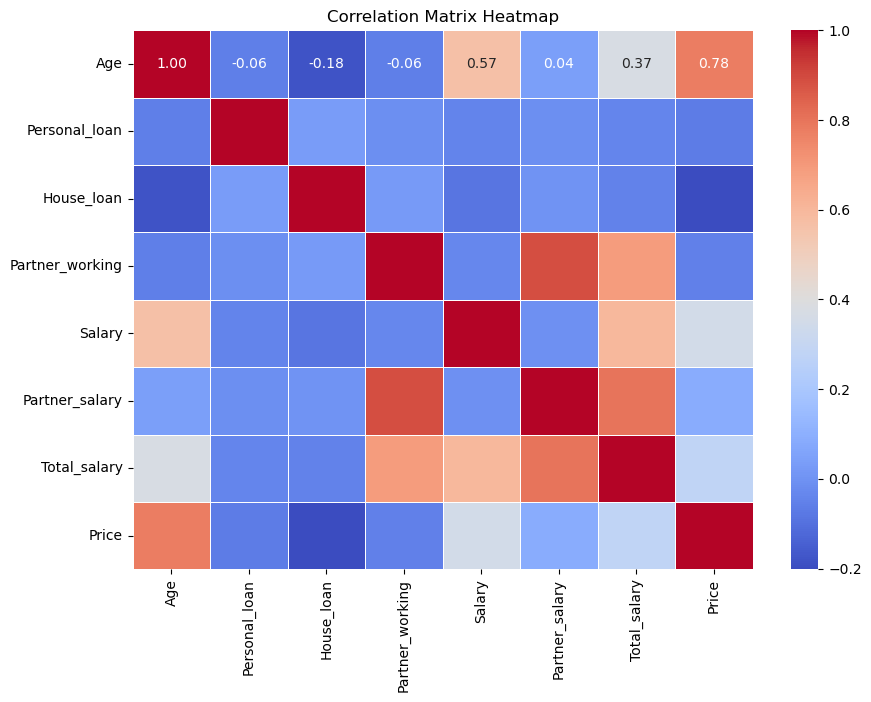

In [30]:
numeric_cols = dataset.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

# Correlation between Age and Salary
age_salary_corr = corr_matrix.loc['Age', 'Salary']
print(f"Correlation between Age and Salary: {age_salary_corr:.2f}")

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# What percentage of individuals have taken a personal loan? How does this compare between males and females?

In [31]:
loan_counts = dataset['Personal_loan'].value_counts(normalize=True) * 100
print(loan_counts)


Personal_loan
1    50.482315
0    49.517685
Name: proportion, dtype: float64


In [32]:
loan_by_gender = dataset.groupby(['Gender', 'Personal_loan']).size().unstack()
loan_by_gender_percent = loan_by_gender.div(loan_by_gender.sum(axis=1), axis=0) * 100
print(loan_by_gender_percent)


Personal_loan          0          1
Gender                             
Female         53.481013  46.518987
Male           48.506860  51.493140


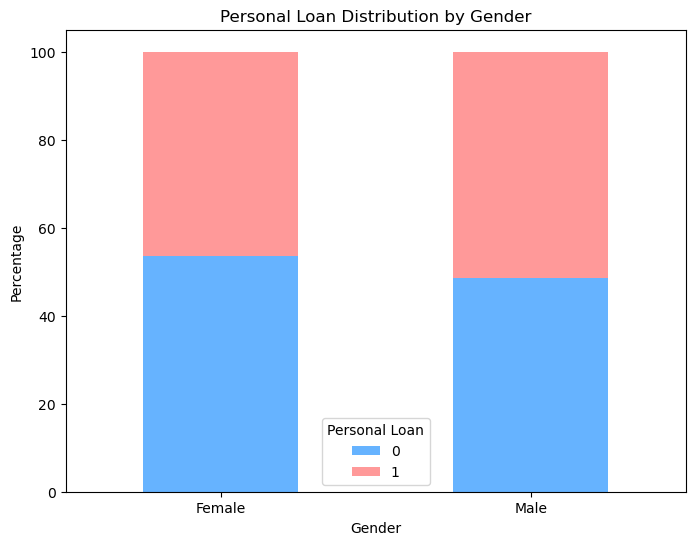

In [33]:
loan_by_gender_percent.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'], figsize=(8, 6))
plt.title('Personal Loan Distribution by Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Personal Loan')
plt.show()


In [34]:
loan_by_gender_percent = dataset.groupby(['Gender', 'Personal_loan']).size().unstack()
loan_by_gender_percent = loan_by_gender_percent.div(loan_by_gender_percent.sum(axis=1), axis=0) * 100

# Extract values
male_loan_pct = loan_by_gender_percent.loc['Male', 1]
female_loan_pct = loan_by_gender_percent.loc['Female', 1]
difference = male_loan_pct - female_loan_pct

print(f"Males have taken {difference:.2f}% more personal loans than females.")



Males have taken 4.97% more personal loans than females.


# o	What is the average number of dependents for married individuals versus single individuals?

In [36]:

dataset['No_of_Dependents'] = pd.to_numeric(dataset['No_of_Dependents'], errors='coerce')

# Now group by marital status and calculate the average
avg_dep = dataset.groupby('Marital_status')['No_of_Dependents'].mean().round(2)

print(avg_dep)


Marital_status
Married    2.53
Single     1.61
Name: No_of_Dependents, dtype: float64


# 	How does the employment status of a partner affect the total combined salary?

In [37]:
avg_partner_salary_by_house_loan = dataset.groupby('House_loan')['Partner_salary'].mean()
print(avg_partner_salary_by_house_loan.round(2))


House_loan
0    18010.21
1    18194.88
Name: Partner_salary, dtype: float64


In [38]:
avg_total_salary_by_partner_status = dataset.groupby('Partner_working')['Total_salary'].mean()
print(avg_total_salary_by_partner_status.round(2))


Partner_working
0    60256.45
1    92631.95
Name: Total_salary, dtype: float64


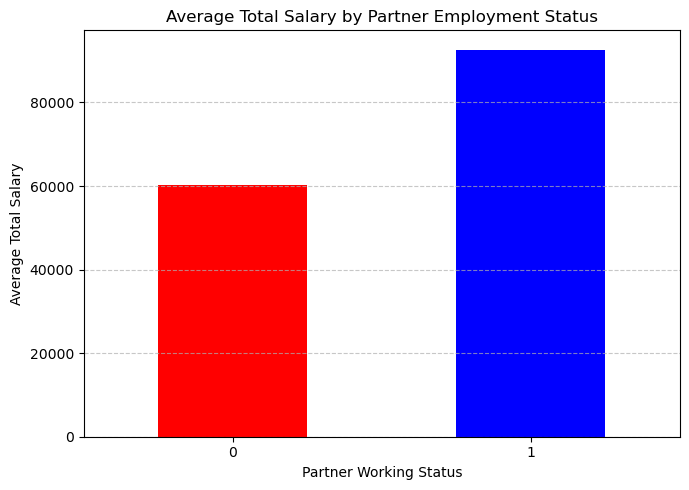

In [39]:
import matplotlib.pyplot as plt

avg_total_salary_by_partner_status = dataset.groupby('Partner_working')['Total_salary'].mean().round(2)

avg_total_salary_by_partner_status.plot(kind='bar', color=['red', 'blue'], figsize=(7,5))
plt.title("Average Total Salary by Partner Employment Status")
plt.xlabel("Partner Working Status")
plt.ylabel("Average Total Salary")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 	Compare the average salary of individuals whose partners are working versus those whose partners are not working.

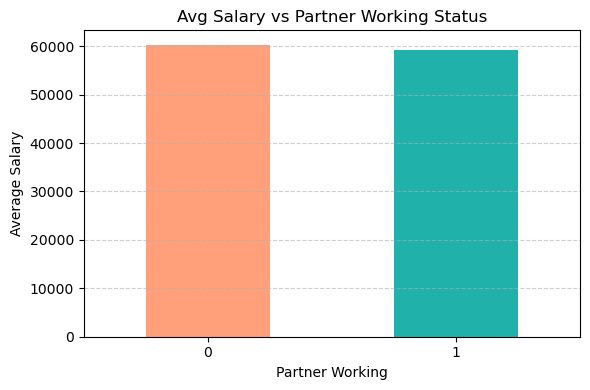

Individuals with working partners earn ₹-1001.22 more on average.
This is a -1.66% increase compared to those with non-working partners.


In [40]:
import matplotlib.pyplot as plt

# Step 1: Calculate average salary based on partner's working status
avg_sal = dataset.groupby('Partner_working')['Salary'].mean().round(2)

# Step 2: Calculate percentage difference
increase = avg_sal[1] - avg_sal[0]
percent_increase = (increase / avg_sal[0]) * 100

# Step 3: Visualization
plt.figure(figsize=(6, 4))
avg_sal.plot(kind='bar', color=['#ffa07a', '#20b2aa'])
plt.title("Avg Salary vs Partner Working Status")
plt.xlabel("Partner Working")
plt.ylabel("Average Salary")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print summary
print(f"Individuals with working partners earn ₹{increase:.2f} more on average.")
print(f"This is a {percent_increase:.2f}% increase compared to those with non-working partners.")


# 	What is the distribution of salaries for individuals with personal loans versus those without personal loans? Represent it using a box plot.

Salary distribution statistics based on Personal Loan status:

               count          mean           std      min      25%      50%  \
Personal_loan                                                                 
0              770.0  60372.337662  14498.117262  30000.0  51800.0  59900.0   
1              785.0  59068.853503  13534.197332  30100.0  51800.0  58900.0   

                   75%      max  
Personal_loan                    
0              72200.0  90300.0  
1              68600.0  90700.0  


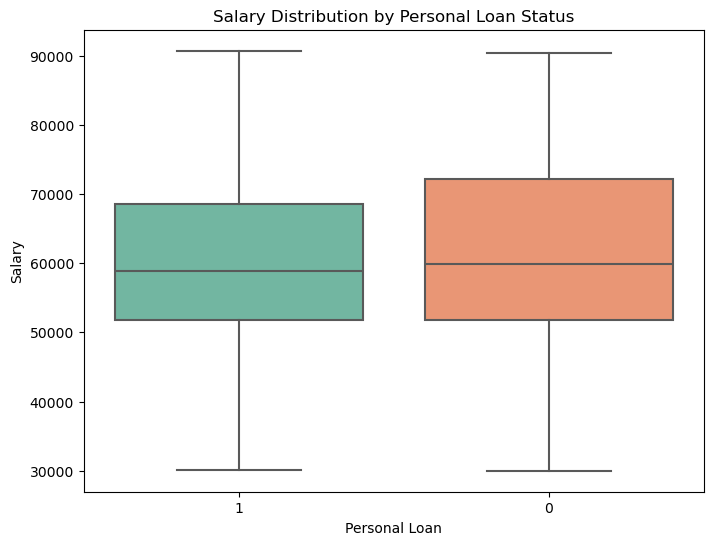

In [41]:
# Clean Personal_loan column first
dataset['Personal_loan'] = dataset['Personal_loan'].astype(str).str.strip().str.title()

# Calculate descriptive stats for Salary grouped by Personal_loan
salary_stats = dataset.groupby('Personal_loan')['Salary'].describe()

print("Salary distribution statistics based on Personal Loan status:\n")
print(salary_stats)

# Plot salary distribution grouped by Personal_loan status
plt.figure(figsize=(8,6))
sns.boxplot(x='Personal_loan', y='Salary', data=dataset, palette='Set2')
plt.title('Salary Distribution by Personal Loan Status')
plt.xlabel('Personal Loan')
plt.ylabel('Salary')
plt.show()


# 	How does the type of automobile relate to the salary of the individuals? Provide insights based on the make of the automobile.

Salary statistics by Automobile Make:

                   mean   median  count
Make                                   
Suv        69528.438662  72200.0    269
?          65975.000000  65975.0      2
Sedan      59775.000000  59800.0    702
Hatchback  55083.505155  56100.0    582


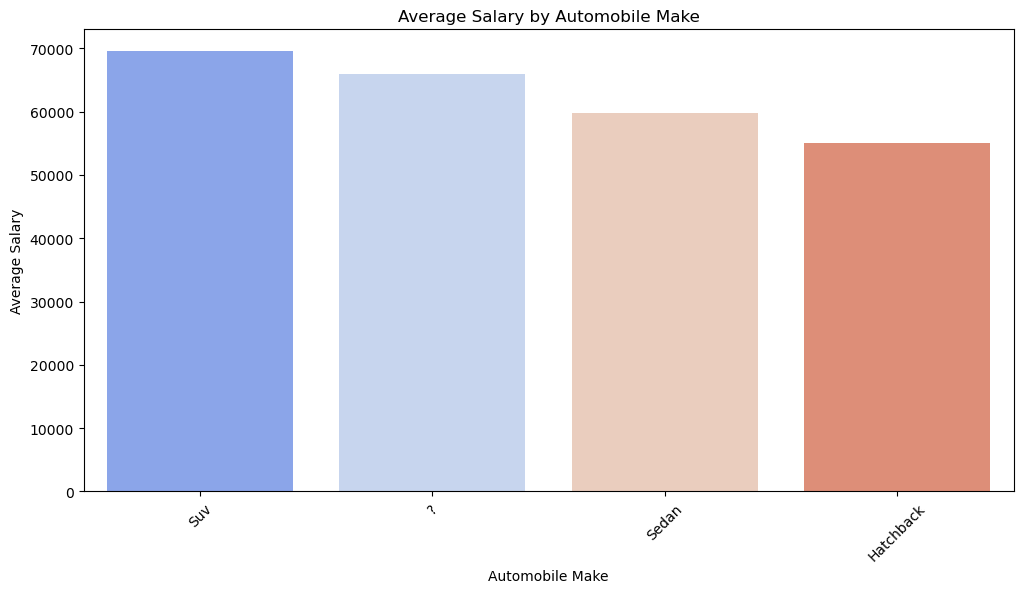

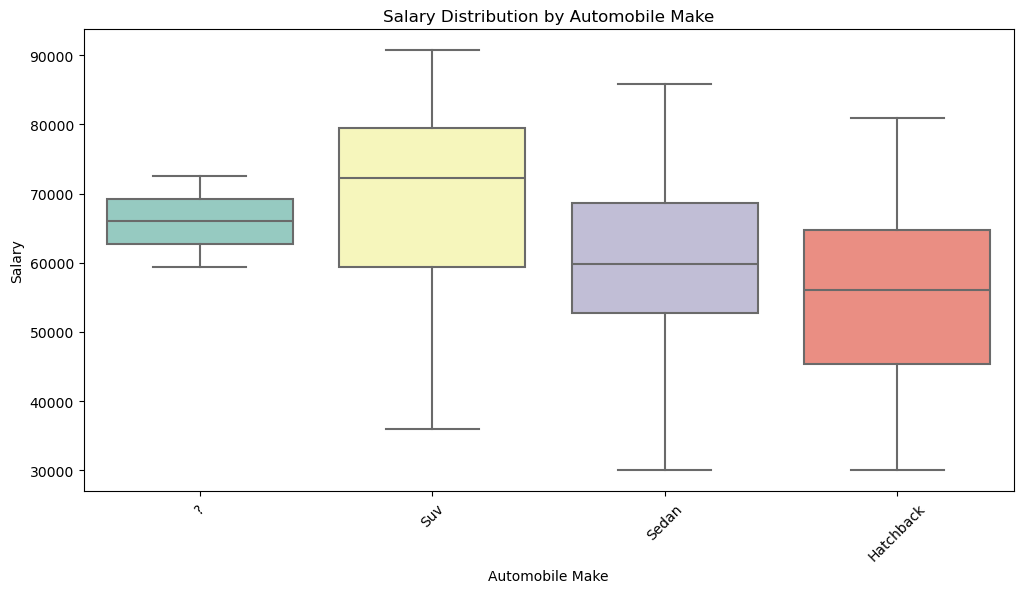

In [42]:
# Clean 'Make' column: remove spaces, fix case if needed
dataset['Make'] = dataset['Make'].astype(str).str.strip().str.title()

make_salary_stats = dataset.groupby('Make')['Salary'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)

print("Salary statistics by Automobile Make:\n")
print(make_salary_stats)

plt.figure(figsize=(12,6))
sns.barplot(x=make_salary_stats.index, y=make_salary_stats['mean'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Salary by Automobile Make')
plt.xlabel('Automobile Make')
plt.ylabel('Average Salary')
plt.show()

# Optional: Boxplot to see distribution
plt.figure(figsize=(12,6))
sns.boxplot(x='Make', y='Salary', data=dataset, palette='Set3')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Automobile Make')
plt.xlabel('Automobile Make')
plt.ylabel('Salary')
plt.show()


# 	What is the average price of the product/service in the dataset? How does this price vary based on the individual's total salary?

In [43]:
average_price = dataset['Price'].mean()
print(f"Average Price of the product/service: {average_price:.2f}")


Average Price of the product/service: 35122.87


In [44]:
correlation = dataset['Price'].corr(dataset['Total_salary'])
print(f"Correlation between Price and Total Salary: {correlation:.3f}")


Correlation between Price and Total Salary: 0.281


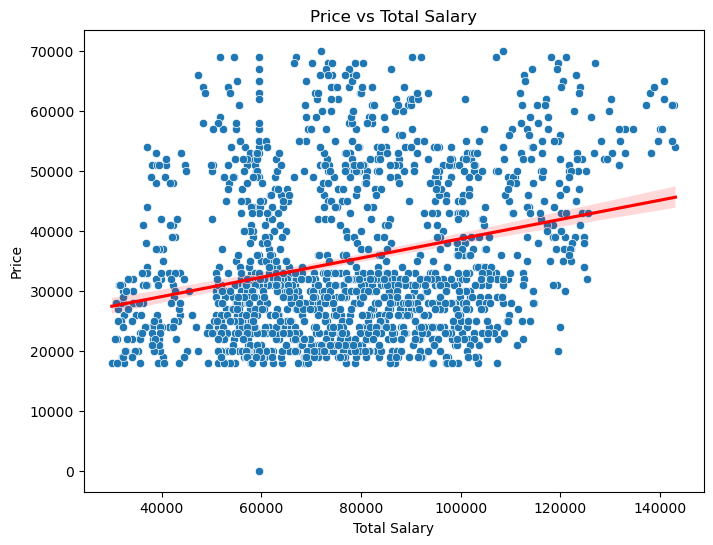

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total_salary', y='Price', data=dataset)
sns.regplot(x='Total_salary', y='Price', data=dataset, scatter=False, color='red')
plt.title('Price vs Total Salary')
plt.xlabel('Total Salary')
plt.ylabel('Price')
plt.show()



Average Price by Total Salary Range:
Salary_Range
0-50k        30809.523810
50k-100k     33900.051786
100k-150k    42079.861111
Name: Price, dtype: float64


C:\Users\khurshid alam\AppData\Local\Temp\ipykernel_5260\1437994499.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_salary_range = dataset.groupby('Salary_Range')['Price'].mean()


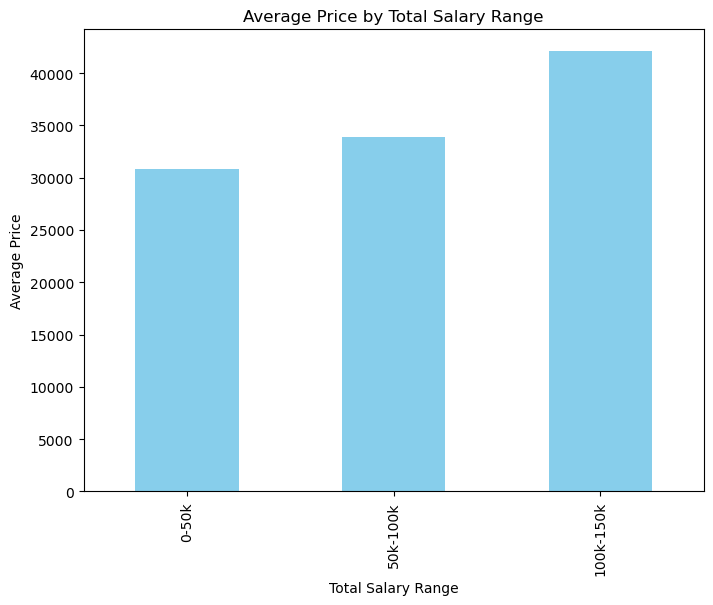

In [46]:
# Create salary bins (adjust bins as needed)
bins = [0, 50000, 100000, 150000]
labels = ['0-50k', '50k-100k', '100k-150k']
dataset['Salary_Range'] = pd.cut(dataset['Total_salary'], bins=bins, labels=labels)

# Average price per salary range
price_by_salary_range = dataset.groupby('Salary_Range')['Price'].mean()

print("\nAverage Price by Total Salary Range:")
print(price_by_salary_range)

# Visualize
plt.figure(figsize=(8,6))
price_by_salary_range.plot(kind='bar', color='skyblue')
plt.title('Average Price by Total Salary Range')
plt.xlabel('Total Salary Range')
plt.ylabel('Average Price')
plt.show()


# Is there a significant difference in the number of personal loans taken by married individuals compared to single individuals?

Personal Loan Count by Marital Status:
 Personal_loan     0    1
Marital_status          
Married         704  713
Single           66   72


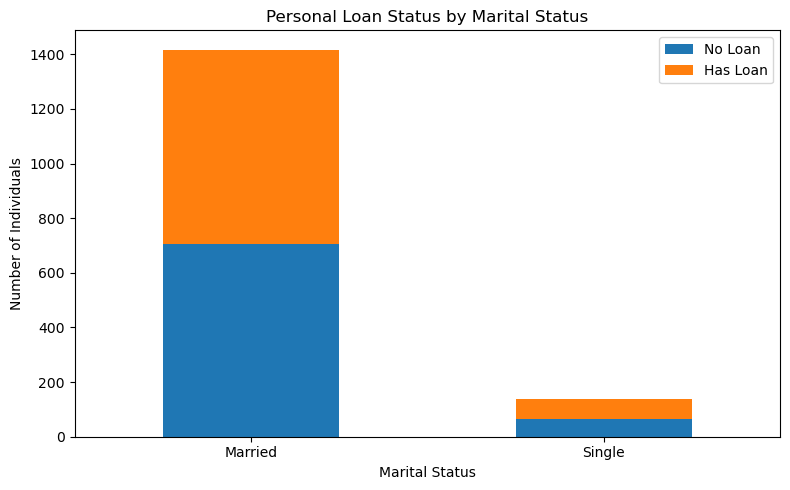

In [47]:
loan_counts = dataset.groupby(['Marital_status', 'Personal_loan']).size().unstack(fill_value=0)

# Display raw numbers
print("Personal Loan Count by Marital Status:\n", loan_counts)

# Plot
loan_counts.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Personal Loan Status by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Individuals")
plt.xticks(rotation=0)
plt.legend(['No Loan', 'Has Loan'])
plt.tight_layout()
plt.show()

# How does educational qualification impact the likelihood of taking a house loan?

House Loan Count by Education:
 House_loan       0    1
Education              
Graduate       389  202
Post Graduate  639  325


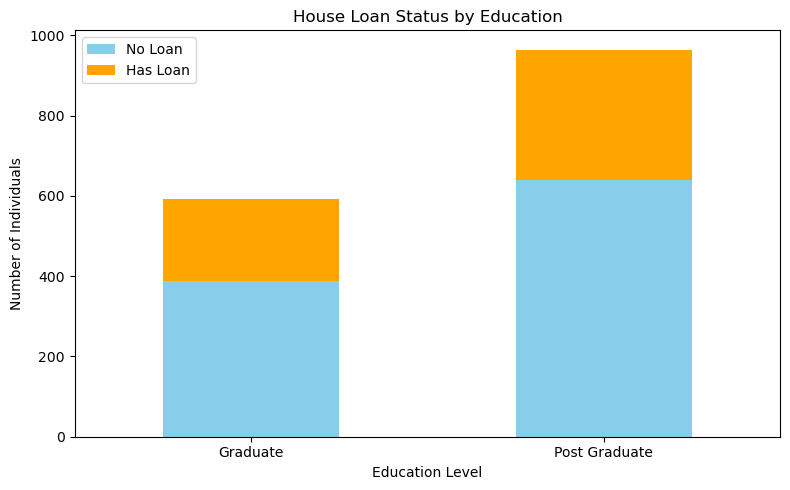

In [48]:
edu_house_loan = dataset.groupby(['Education', 'House_loan']).size().unstack(fill_value=0)

# Display the counts
print("House Loan Count by Education:\n", edu_house_loan)

# Plot
edu_house_loan.plot(kind='bar', stacked=True, figsize=(8, 5), color=["skyblue", "orange"])
plt.title("House Loan Status by Education")
plt.xlabel("Education Level")
plt.ylabel("Number of Individuals")
plt.xticks(rotation=0)
plt.legend(['No Loan', 'Has Loan'])
plt.tight_layout()
plt.show()

# 	Analyze the number of dependents based on the profession of the individual. Which profession has the highest average number of dependents?

In [49]:
# Ensure dependents are numeric
dataset['No_of_Dependents'] = pd.to_numeric(dataset['No_of_Dependents'], errors='coerce')

# Drop rows with missing Profession or Dependents
df_clean = dataset.dropna(subset=['Profession', 'No_of_Dependents'])


Average number of dependents by profession:
 Profession
Business    2.484536
Salaried    2.416476
Name: No_of_Dependents, dtype: float64


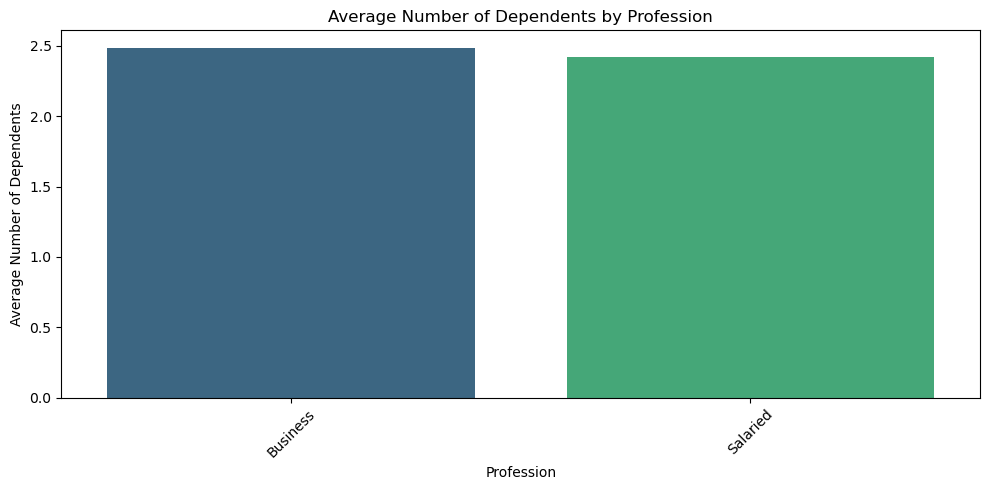


🏆 Profession with highest average dependents: Business (2.48)


In [50]:
dependents_by_profession = df_clean.groupby('Profession')['No_of_Dependents'].mean().sort_values(ascending=False)

# Print the results
print("Average number of dependents by profession:\n", dependents_by_profession)

# Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=dependents_by_profession.index, y=dependents_by_profession.values, palette='viridis')
plt.title("Average Number of Dependents by Profession")
plt.xlabel("Profession")
plt.ylabel("Average Number of Dependents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Profession with highest average
top_profession = dependents_by_profession.idxmax()
top_value = dependents_by_profession.max()
print(f"\n🏆 Profession with highest average dependents: {top_profession} ({top_value:.2f})")

# Is there a significant difference in salaries between males and females? Provide statistical evidence.

In [51]:
# Standardize gender entries (e.g., fix "Femal")
dataset['Gender'] = dataset['Gender'].str.strip().str.capitalize()
dataset['Gender'] = dataset['Gender'].replace({'Femal': 'Female'})

# Drop rows with missing gender or salary
df_gender_salary = dataset.dropna(subset=['Gender', 'Salary'])


T-statistic: -7.45
P-value: 0.0000
✅ There IS a statistically significant difference in salaries between males and females.


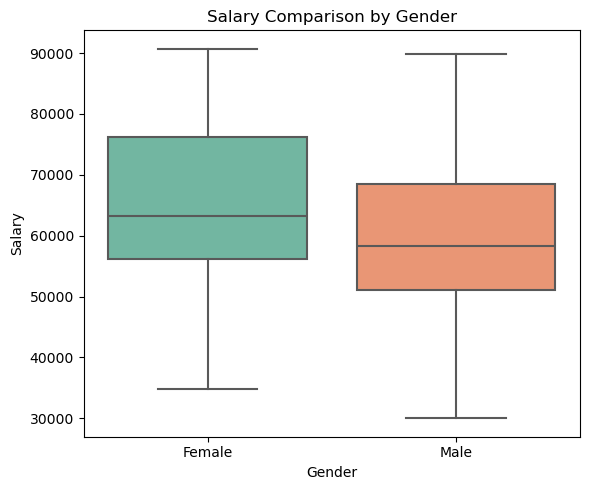

In [52]:
from scipy.stats import ttest_ind
male_salaries = df_gender_salary[df_gender_salary['Gender'] == 'Male']['Salary']
female_salaries = df_gender_salary[df_gender_salary['Gender'] == 'Female']['Salary']

# T-test
t_stat, p_value = ttest_ind(male_salaries, female_salaries, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ There IS a statistically significant difference in salaries between males and females.")
else:
    print("❌ There is NO statistically significant difference in salaries between males and females.")

# Boxplot visualization
plt.figure(figsize=(6, 5))
sns.boxplot(data=df_gender_salary, x='Gender', y='Salary', palette='Set2')
plt.title("Salary Comparison by Gender")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

# Build a regression model to predict an individual's salary based on age, education, and number of dependents. Discuss the model's accuracy and significance

In [53]:
import pandas as pd
import numpy as np

# Drop missing values in relevant columns
df_reg = dataset[['Age', 'Education', 'No_of_Dependents', 'Salary']].copy()
df_reg['No_of_Dependents'] = pd.to_numeric(df_reg['No_of_Dependents'], errors='coerce')
df_reg.dropna(inplace=True)

# Encode Education (Graduate = 0, Post Graduate = 1)
df_reg['Education'] = df_reg['Education'].map({'Graduate': 0, 'Post Graduate': 1})


In [54]:
# Convert Education to binary: Graduate = 0, Post Graduate = 1
df_reg['Education'] = df_reg['Education'].map({'Graduate': 0, 'Post Graduate': 1})


In [55]:
# Define independent variables (features)
X = df_reg[['Age', 'Education', 'No_of_Dependents']]

# Define dependent variable (target)
y = df_reg['Salary']


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
# Select relevant columns
df_model = dataset[['Age', 'Education', 'No_of_Dependents', 'Salary']].copy()

# Clean and encode
df_model['No_of_Dependents'] = pd.to_numeric(df_model['No_of_Dependents'], errors='coerce')
df_model['Education'] = df_model['Education'].map({'Graduate': 0, 'Post Graduate': 1})

# Drop rows with missing values
df_model.dropna(inplace=True)

# Define features (X) and target (y)
X = df_model[['Age', 'Education', 'No_of_Dependents']]
y = df_model['Salary']


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [60]:
y_pred = model.predict(X_test)


In [61]:
# R-squared
r2 = r2_score(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared      : {r2:.4f}")
print(f"Mean Squared Error (MSE) : {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:.2f}")
print(f"Mean Absolute Error (MAE) : {mae:.2f}")


R-squared      : 0.7644
Mean Squared Error (MSE) : 49948700.00
Root Mean Squared Error (RMSE) : 7067.44
Mean Absolute Error (MAE) : 5697.20


In [62]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coeff_df)



Model Coefficients:
            Feature   Coefficient
0               Age    987.761857
1         Education  18714.411074
2  No_of_Dependents    786.135169


# Create a histogram showing the distribution of total combined salaries. Identify and discuss any skewness or outliers in the data.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Total_salary is numeric
dataset['Total_salary'] = pd.to_numeric(dataset['Total_salary'], errors='coerce')

# Drop NaNs if any
df_salary = dataset.dropna(subset=['Total_salary'])


C:\Users\khurshid alam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


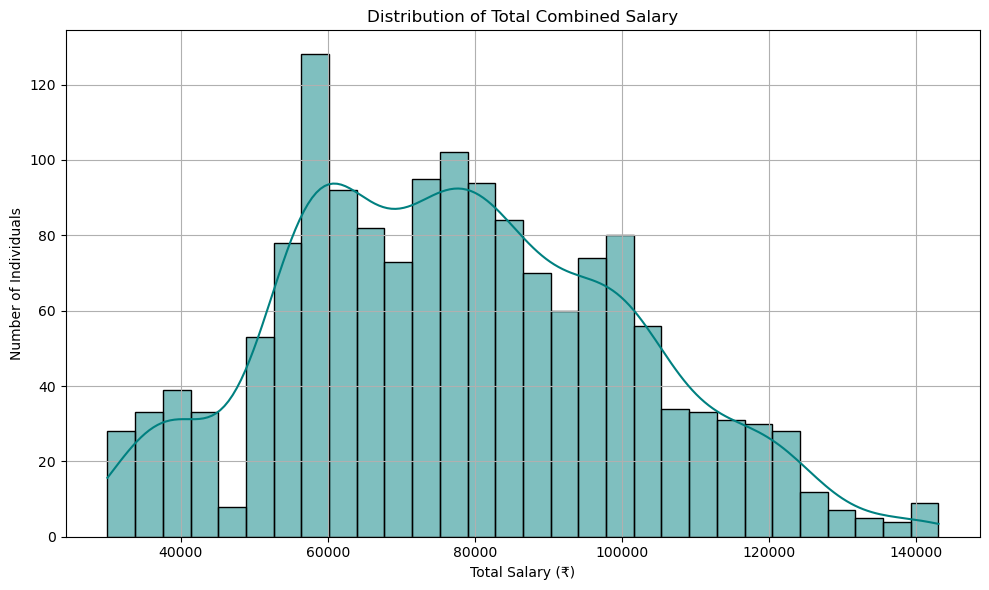

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(df_salary['Total_salary'], bins=30, kde=True, color='teal')
plt.title('Distribution of Total Combined Salary')
plt.xlabel('Total Salary (₹)')
plt.ylabel('Number of Individuals')
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
# Skewness value
skew_value = df_salary['Total_salary'].skew()
print(f"Skewness: {skew_value:.2f}")


Skewness: 0.23
